In [1]:
import numpy as np 

# Preparing data

In [2]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

print(X.shape)
print(y.shape)

(500, 2)
(500,)


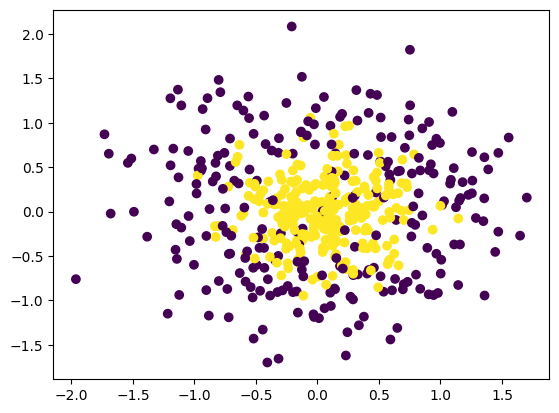

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y)

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)

(400, 2)
(100, 2)


# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.6339420180722891, 0.9642857142857143, 'x[1] <= 0.395\ngini = 0.499\nsamples = 400\nvalue = [207.0, 193.0]'),
 Text(0.34770331325301207, 0.8928571428571429, 'x[1] <= -0.61\ngini = 0.489\nsamples = 307\nvalue = [131, 176]'),
 Text(0.4908226656626506, 0.9285714285714286, 'True  '),
 Text(0.12650602409638553, 0.8214285714285714, 'x[1] <= -0.745\ngini = 0.271\nsamples = 68\nvalue = [57, 11]'),
 Text(0.060240963855421686, 0.75, 'x[1] <= -0.858\ngini = 0.122\nsamples = 46\nvalue = [43, 3]'),
 Text(0.03614457831325301, 0.6785714285714286, 'x[0] <= -0.073\ngini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(0.024096385542168676, 0.6071428571428571, 'x[0] <= -0.157\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.012048192771084338, 0.5357142857142857, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.03614457831325301, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04819277108433735, 0.6071428571428571, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 

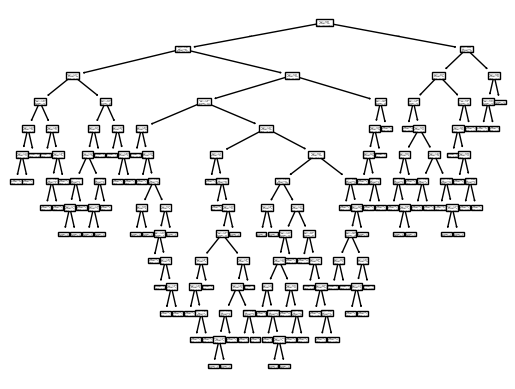

In [7]:
from sklearn.tree import plot_tree
plot_tree(dt)

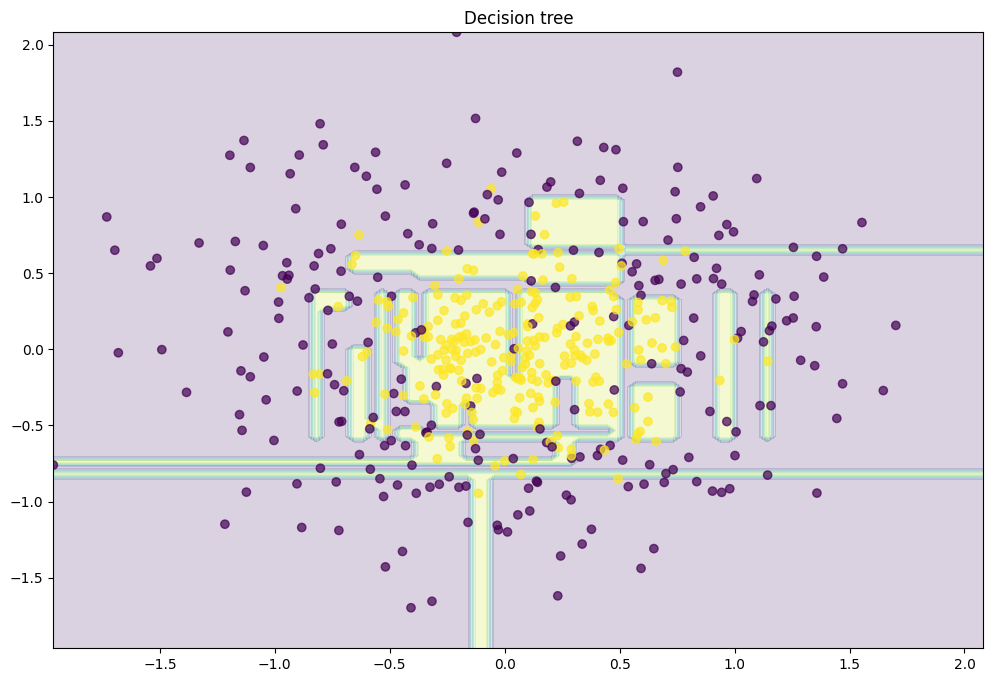

In [8]:
plt.figure(figsize=(12, 8)) 
x_range = np.linspace(X.min(), X.max(), 100) 
xx1, xx2 = np.meshgrid(x_range, x_range) 
y_hat = dt.predict(np.c_[xx1.ravel(), xx2.ravel()]) 
y_hat = y_hat.reshape(xx1.shape) 
plt.contourf(xx1, xx2, y_hat, alpha=0.2) 
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7) 
plt.title("Decision tree") 
plt.show()


This model is overfitting. Its a low bias and high variance result.

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

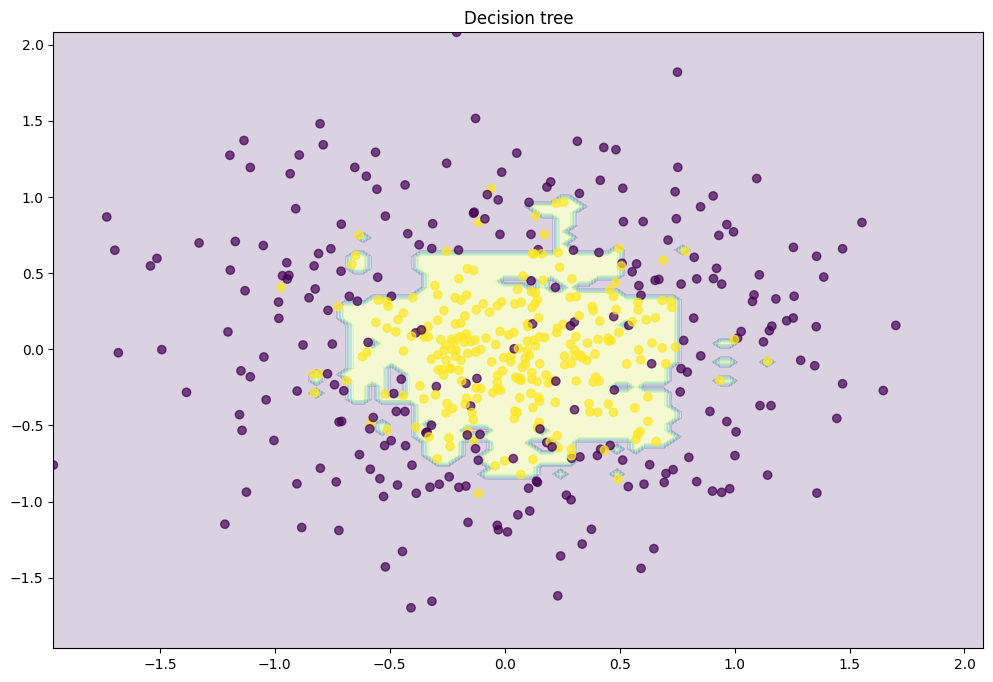

In [10]:
plt.figure(figsize=(12, 8)) 
x_range = np.linspace(X.min(), X.max(), 100) 
xx1, xx2 = np.meshgrid(x_range, x_range) 
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()]) 
y_hat = y_hat.reshape(xx1.shape) 
plt.contourf(xx1, xx2, y_hat, alpha=0.2) 
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7) 
plt.title("Decision tree") 
plt.show()

(-5.0, 5.0)

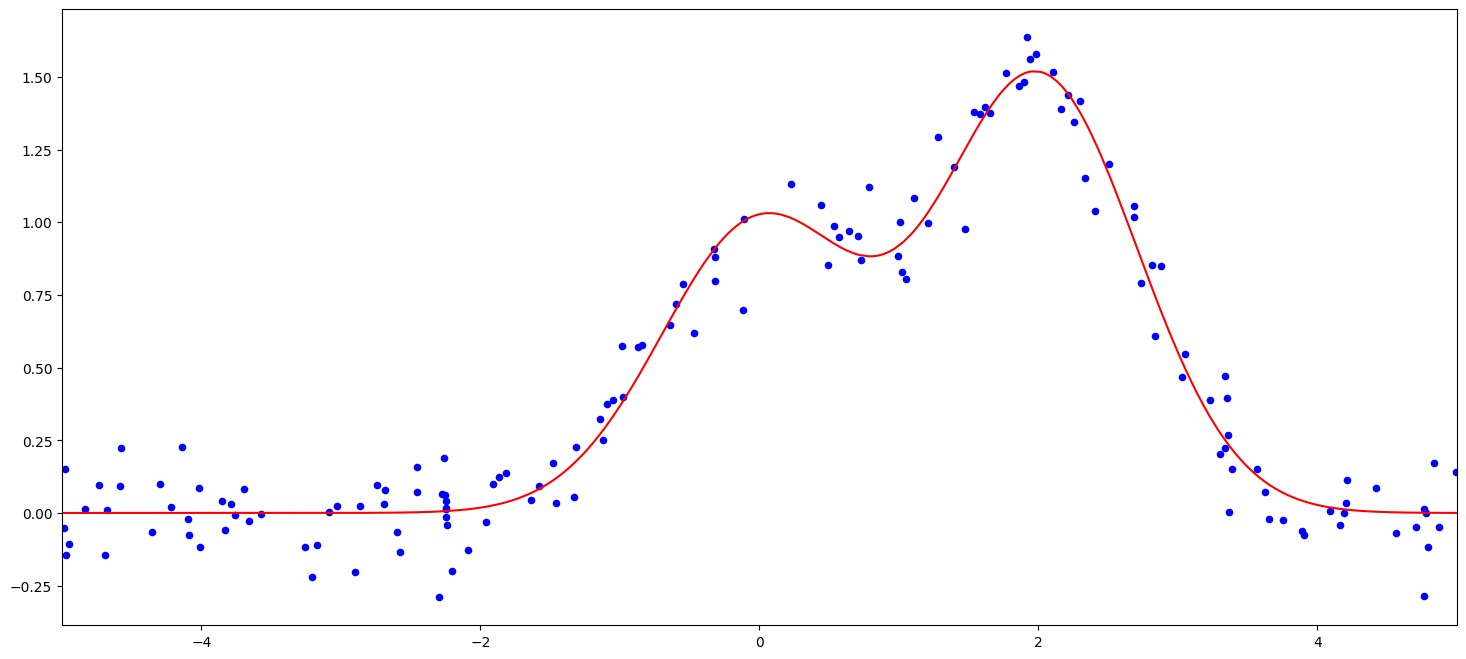

In [11]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
     

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 23.23')

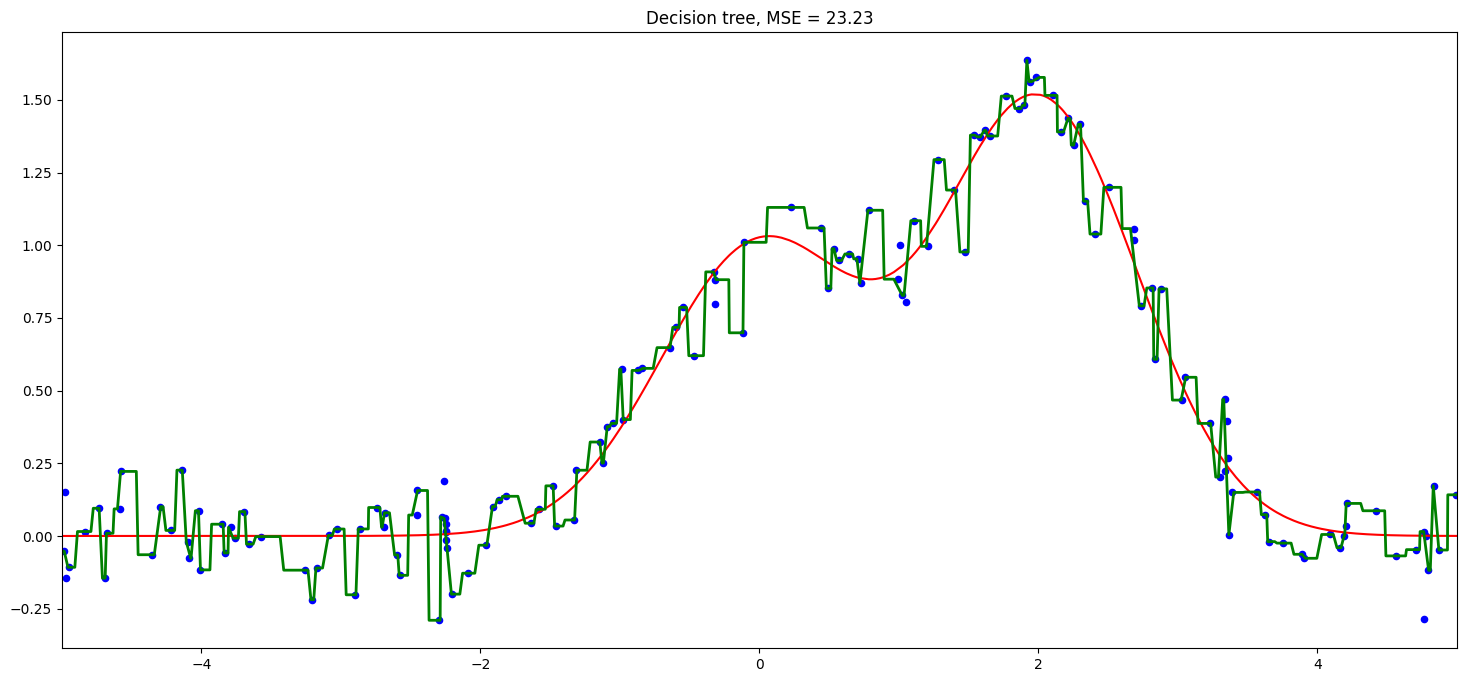

In [12]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

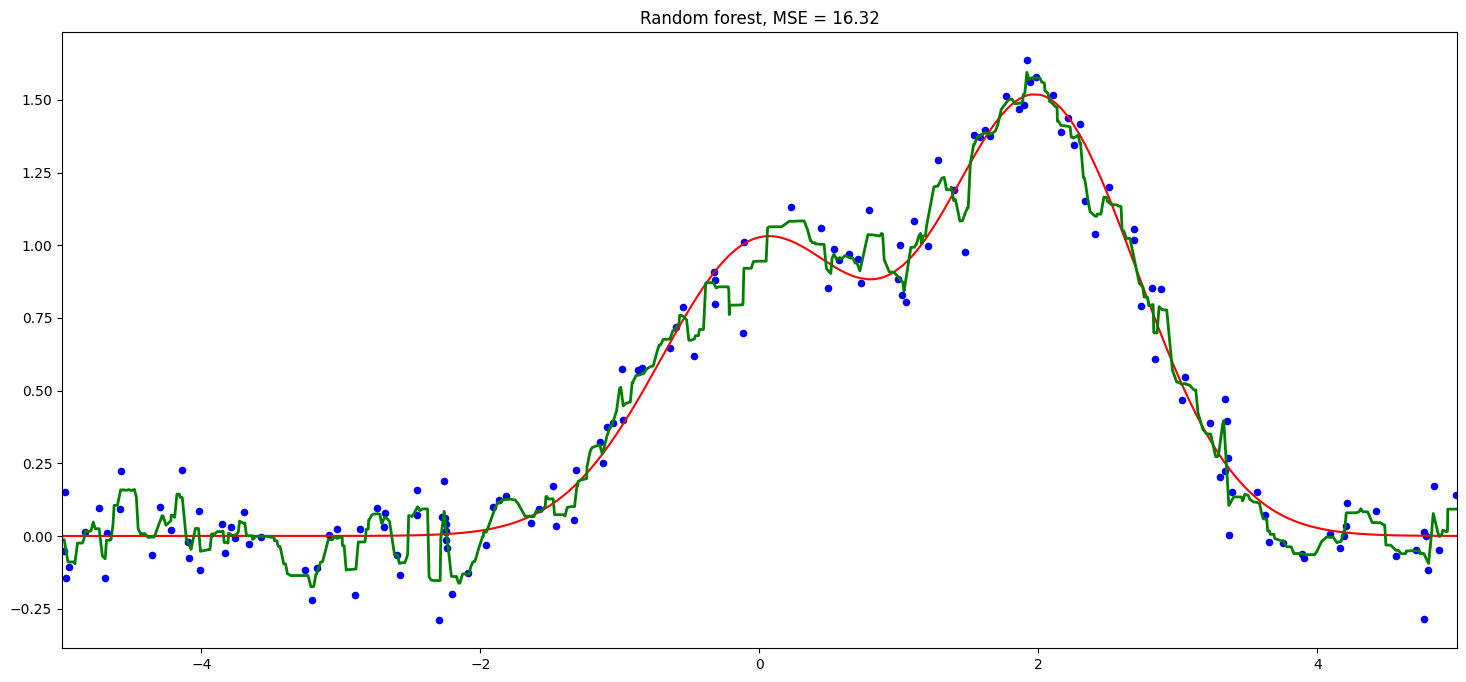

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));